In [4]:
#bedtools intersect -a hg38_EE.bed -b gtex_v8_exon_id_map.tsv -wa -wb > ovlp_ee_gtex_id_file.tsv
#wc -l ovlp_ee_gtex_id_file.tsv -> 13365 ovlp_ee_gtex_id_file.tsv
#awk '{print $4}' ovlp_ee_gtex_id_file.tsv |sort -u |wc -l -> 13313

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

######## EE
list_ee_id_in_psi_files = []
with open("/home/mouren/Data/revisions/splicing_exons/2_gtex_psi/ovlp_ee_gtex_id_file.tsv") as f:
    for line in f:
        if line.strip().split()[7] not in list_ee_id_in_psi_files:
            list_ee_id_in_psi_files.append(line.strip().split()[7]) #7 ee 9 neg

# Directory with the files
directory = "/home/mouren/Data/revisions/splicing_exons/2_gtex_psi/01_raw_psi"

# Dictionary to store results per file
file_stats = {}

# Process each file
for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)
    if os.path.isfile(file_path):
        # Load file, assume no header, first column is ID
        df = pd.read_csv(file_path, sep='\t', header=0, index_col=0, na_values='NA')

        # Filter rows where index is in id_set
        filtered = df[df.index.isin(list_ee_id_in_psi_files)]

        if not filtered.empty:
            stats = filtered.mean(axis=1, skipna=True)
            file_stats["_".join(filename.split("_")[:-1])] = stats.values

for key,val in file_stats.items():
    cleaned = [float(x) for x in val if isinstance(x, (int, float))]
    print(key, len(val), "Mean:", np.nanmean(val), "Median:", np.nanmedian(val))
    
# Convert to DataFrame for plotting
df_ee = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in file_stats.items()])) 

Artery_Tibial 12105 Mean: 0.8939384985957116 Median: 0.9991139393939393
Esophagus_Mucosa 12020 Mean: 0.906771222223378 Median: 0.999298918918919
Spleen 11720 Mean: 0.8914546971705075 Median: 0.9988015253039555
Pituitary 12488 Mean: 0.9200924808185239 Median: 0.9991320284697509
Liver 11243 Mean: 0.8903613985682347 Median: 0.9998498672566372
Whole_Blood 11310 Mean: 0.830828568164448 Median: 0.996765105485232
Brain_Cerebellum 11732 Mean: 0.8930107679705177 Median: 0.9983728328219255
Nerve_Tibial 12329 Mean: 0.8949351678725274 Median: 0.9987233671917071
Lung 12487 Mean: 0.9074087599637197 Median: 0.9982433930346755
Brain_Cortex 11924 Mean: 0.9279612603375584 Median: 1.0
Muscle_Skeletal 11736 Mean: 0.8979219682682639 Median: 0.9996168493150684
Adipose_Subcutaneous 12339 Mean: 0.9029972882674944 Median: 0.9990434539969835
Skin_Sun_Exposed_Lower_leg 12390 Mean: 0.9055318336575523 Median: 0.9989739573534733
Thyroid 12496 Mean: 0.9038029477218765 Median: 0.9988969525267994
Cells_Cultured_fibrob

In [5]:
######## neg
list_neg_id_in_psi_files = []
with open("/home/mouren/Data/revisions/splicing_exons/2_gtex_psi/ovlp_neg_gtex_id_file.tsv") as f:
    for line in f:
        if line.strip().split()[7] not in list_neg_id_in_psi_files:
            list_neg_id_in_psi_files.append(line.strip().split()[9]) #7 ee 9 neg

# Directory with the files
directory = "/home/mouren/Data/revisions/splicing_exons/2_gtex_psi/01_raw_psi"

# Dictionary to store results per file
file_stats = {}

# Process each file
for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)
    if os.path.isfile(file_path):
        # Load file, assume no header, first column is ID
        df = pd.read_csv(file_path, sep='\t', header=0, index_col=0, na_values='NA')

        # Filter rows where index is in id_set
        filtered = df[df.index.isin(list_neg_id_in_psi_files)]

        if not filtered.empty:
            stats = filtered.mean(axis=1, skipna=True)
            file_stats["_".join(filename.split("_")[:-1])] = stats.values

for key,val in file_stats.items():
    cleaned = [float(x) for x in val if isinstance(x, (int, float))]
    print(key, len(val), "Mean:", np.nanmean(val), "Median:", np.nanmedian(val))
    
# Convert to DataFrame for plotting
df_neg = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in file_stats.items()])) 

Artery_Tibial 11396 Mean: 0.8671003647942012 Median: 0.9990892749244713
Esophagus_Mucosa 11165 Mean: 0.8876923860597803 Median: 0.9994032166301969
Spleen 10913 Mean: 0.8790214774933917 Median: 0.9995753970040088
Pituitary 11594 Mean: 0.8956201414368814 Median: 0.9994373498233217
Liver 10364 Mean: 0.8882097556118658 Median: 1.0
Whole_Blood 10327 Mean: 0.8357673077098764 Median: 0.9979346903491821
Brain_Cerebellum 10635 Mean: 0.8573792926827953 Median: 0.998271404494382
Nerve_Tibial 11531 Mean: 0.8669559111894568 Median: 0.9987433602584813
Lung 11685 Mean: 0.8843310834324002 Median: 0.9982562990866661
Brain_Cortex 10924 Mean: 0.8987169258641114 Median: 1.0
Muscle_Skeletal 10986 Mean: 0.8833622706404348 Median: 0.9997465869955813
Adipose_Subcutaneous 11567 Mean: 0.8780020007528371 Median: 0.9991606935483872
Skin_Sun_Exposed_Lower_leg 11559 Mean: 0.8860331197713915 Median: 0.9991835593021896
Thyroid 11722 Mean: 0.8778290210475042 Median: 0.9990782307354447
Cells_Cultured_fibroblasts 10700 

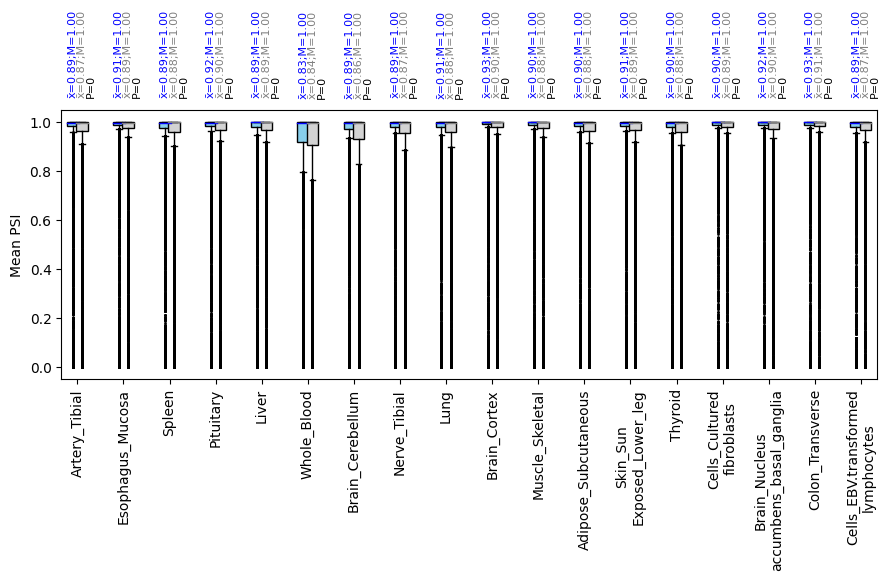

In [14]:
from statsmodels.stats.weightstats import ttost_ind

df_neg = df_neg.reindex(columns=df_ee.columns)

labels = df_ee.columns.tolist()
n = len(labels)

plt.figure(figsize=(max(6, n * 0.5), 6))

positions1 = np.arange(n) * 2
positions2 = positions1 + 0.4  # slight offset for side-by-side
positions3 = positions2 + 0.4  # slight offset for side-by-side

flier_props = dict(marker='o', markersize=1)

# Plot boxplots for each dataset
bplot1 = plt.boxplot([df_ee[col].dropna() for col in labels],
                     positions=positions1,
                     widths=0.5,
                     patch_artist=True,
                     flierprops=flier_props,
                     boxprops=dict(facecolor='skyblue'),
                     medianprops=dict(color='blue'))

bplot2 = plt.boxplot([df_neg[col].dropna() for col in labels],
                     positions=positions2,
                     widths=0.5,
                     patch_artist=True,
                     flierprops=flier_props,
                     boxprops=dict(facecolor='lightgrey'),
                     medianprops=dict(color='grey'))

# Add mean and median text and p val
for i, label in enumerate(labels):
    ee_data = df_ee[label].dropna()
    ctrl_data = df_neg[label].dropna()
    mean1 = np.nanmean(df_ee[label])
    median1 = np.nanmedian(df_ee[label])
    mean2 = np.nanmean(df_neg[label])
    median2 = np.nanmedian(df_neg[label])

     # TOST test: using a ±5 margin (adjust if needed)
    try:
        pval_equiv, pval_lower, pval_upper = ttost_ind(ee_data, ctrl_data, low=-5, upp=5, usevar='unequal')
    except Exception as e:
        pval_equiv = np.nan

    y_max = max([mean1, mean2, median1, median2]) + 1

    plt.text(positions1[i], y_max-0.9, f"x̄={mean1:.2f};M={median1:.2f}", 
             ha='center', va='bottom', rotation=90, color='blue', fontsize=8)
    plt.text(positions2[i], y_max-0.9, f"x̄={mean2:.2f};M={median2:.2f}", 
             ha='center', va='bottom', rotation=90, color='gray', fontsize=8)
    plt.text(positions3[i], y_max-0.9, f"P={pval_equiv:.2g}", 
             ha='center', va='bottom', rotation=90, color='black', fontsize=8)

def shorten_label(label):
    parts = label.split('_')
    if len(parts) > 2:
        # Insert newline after second underscore
        return '_'.join(parts[:2]) + '\n' + '_'.join(parts[2:])
    else:
        return label

short_labels = [shorten_label(lbl) for lbl in labels]

# Axis settings
plt.xticks((positions1 + positions2)/2, short_labels, rotation=90)
plt.ylabel("Mean PSI")
#plt.title("Comparison of PSI Values per Tissue")
plt.tight_layout()

plt.savefig("/home/mouren/Images/tls1/revisions/rev_1_pt3_psi.pdf", format="pdf", bbox_inches="tight", dpi=450)
plt.savefig("/home/mouren/Images/tls1/revisions/rev_1_pt3_psi.png", format="png", bbox_inches="tight", dpi=450)

plt.show()